In [138]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display
import missingno as msno

In [139]:
data_path = "./heart_disease.csv"

In [140]:
df = pd.read_csv(data_path)

df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


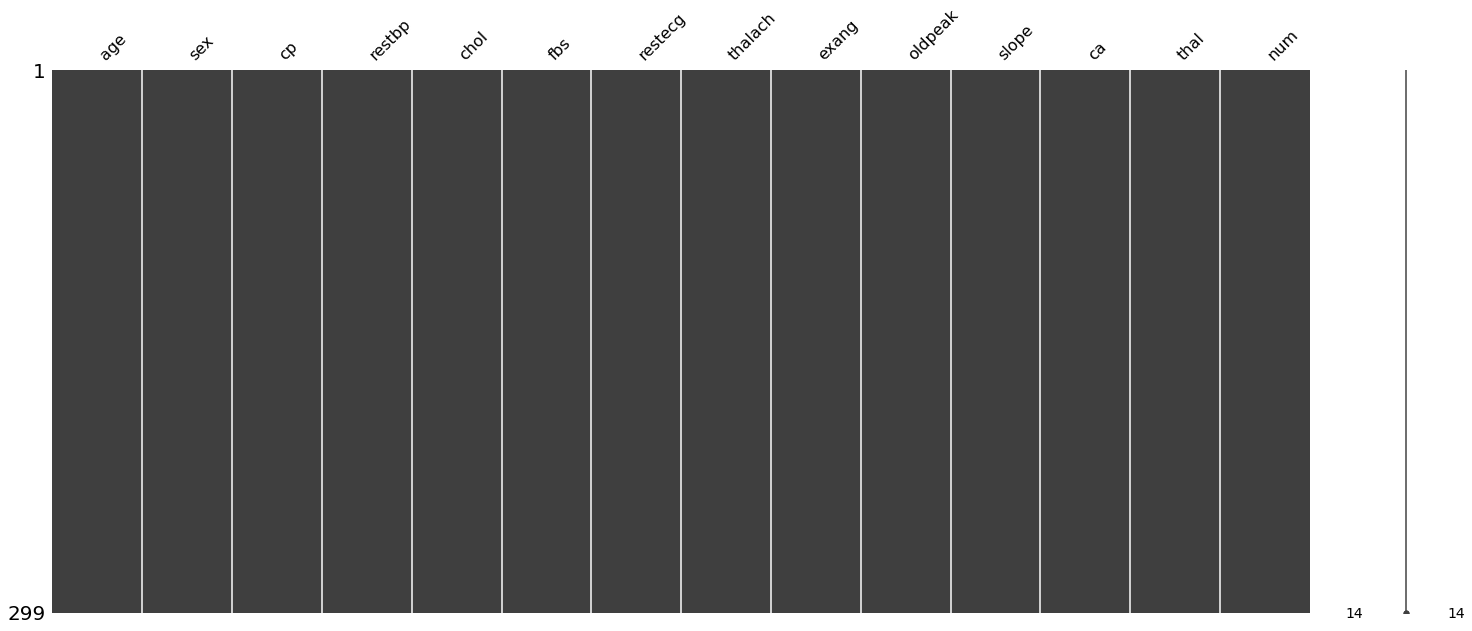

In [144]:
# Missing data visualization
msno.matrix(df)
plt.show()

In [9]:
# Central tendancy of each feature
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,0.67893,3.163880,131.715719,246.785953,0.143813,0.989967,149.327759,0.331104,1.058528,1.605351,0.672241,4.745819,0.946488
std,9.030264,0.46767,0.964069,17.747751,52.532582,0.351488,0.994903,23.121062,0.471399,1.162769,0.616962,0.937438,1.940977,1.230409
min,29.000000,0.00000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.00000,3.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.00000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.00000,4.000000,140.000000,275.500000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [8]:
# Compute number of missing data for each feature
df.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
num        0
dtype: int64

In [85]:
# Categorical vs. Numerical features
categorical_features = [
    "sex",
    "cp",
    "fbs",
    "restecg",
    "exang",
    "slope",
    "thal",
    "num"
]

numerical_features = [
    "age",
    "restbp",
    "chol",
    "thalach",
    "oldpeak",
    "ca"
]

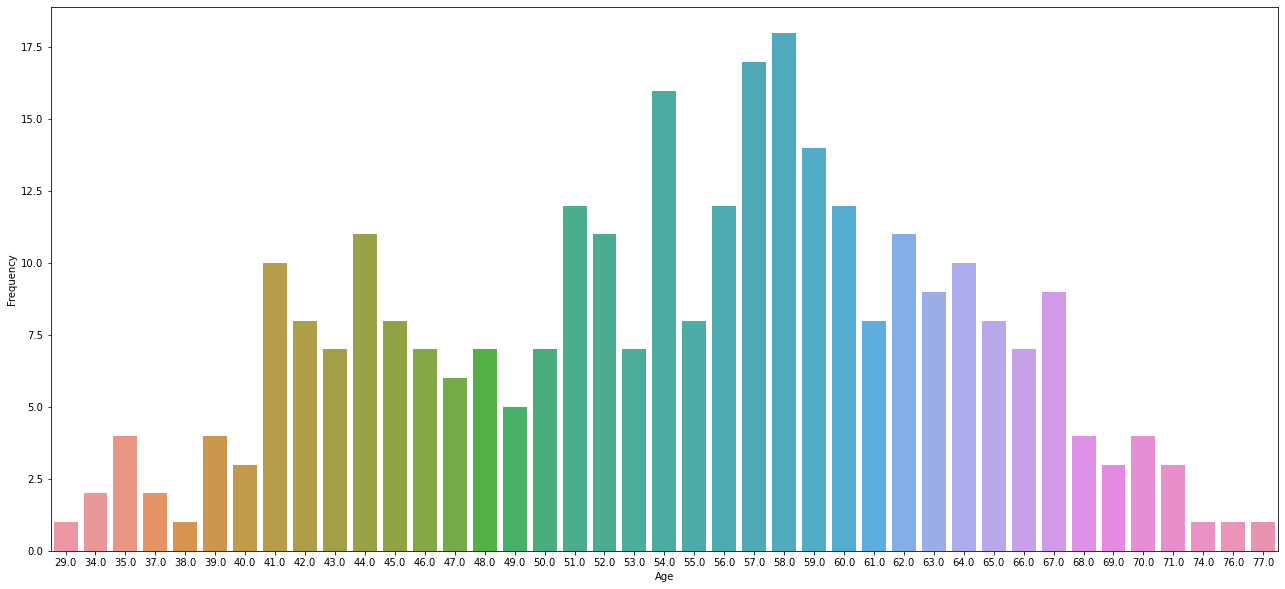

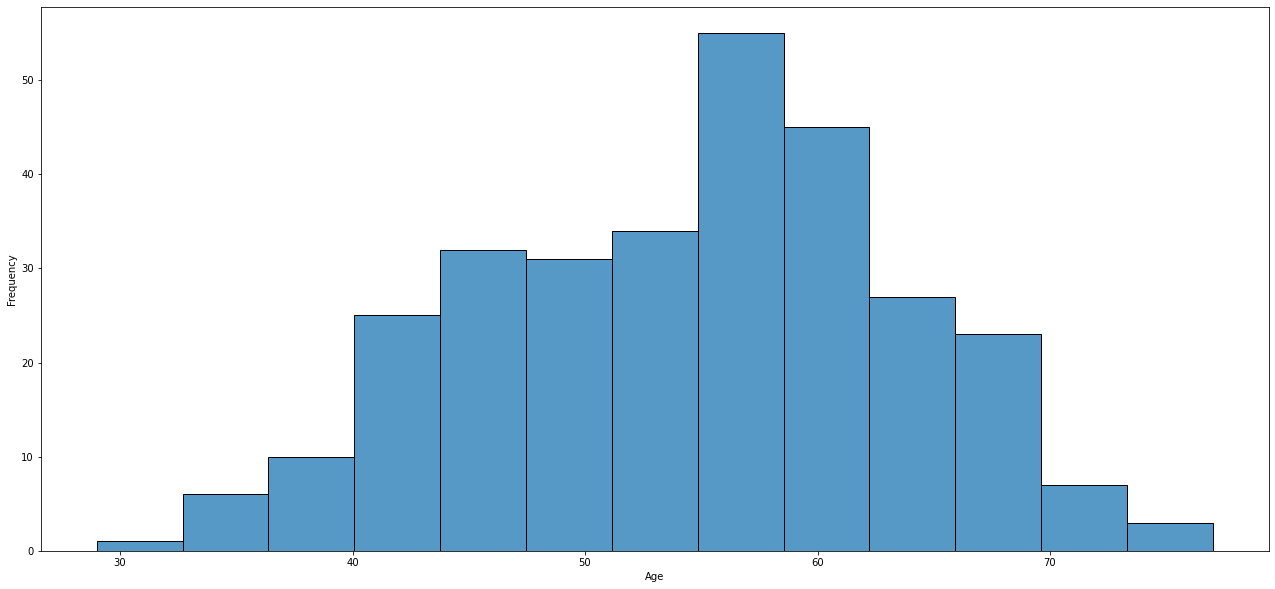

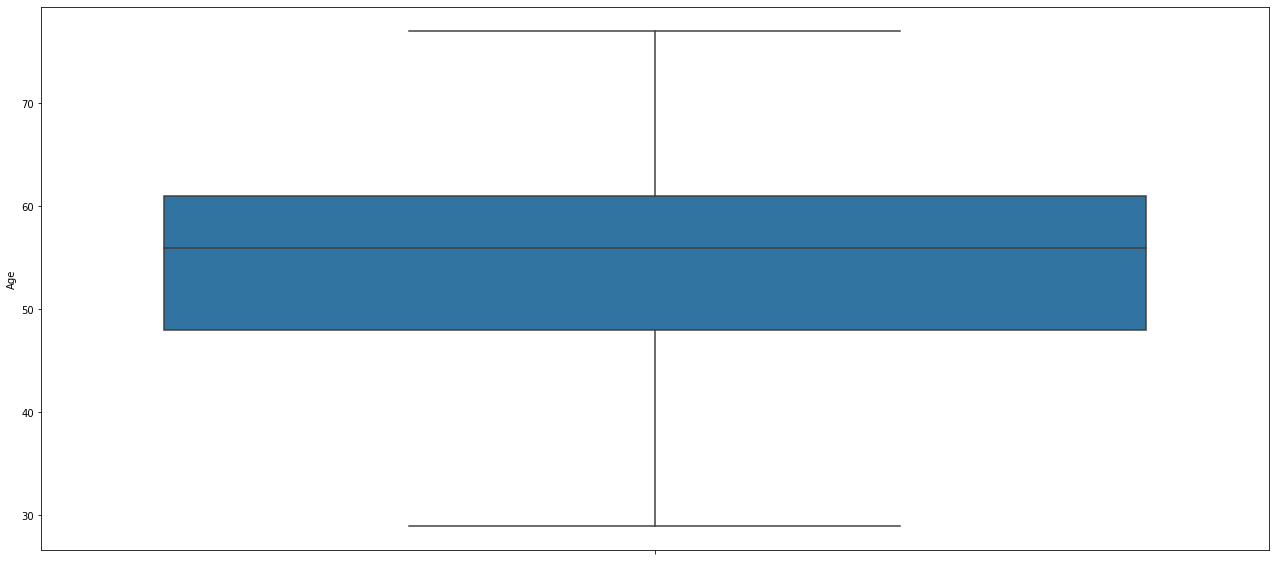

Mean 54.52173913043478
Median 56.0
Mode 58.0


In [134]:
# 1. At what ages do people seek cardiological exams => 54-60 years old

# Bar plot
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.barplot(x=df.age.value_counts().index, y=df.age.value_counts(), ax=ax)
ax.set(ylabel='Frequency')
ax.set(xlabel='Age')
plt.show()

# Hist plot
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.histplot(x=df.age, ax=ax)
ax.set(ylabel='Frequency')
ax.set(xlabel='Age')
plt.show()

# Box plot
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.boxplot(y=df.age, ax=ax)
ax.set(ylabel='Age')
plt.show()

# Describe
mean = df.age.mean()
median = df.age.median()
mode = df.age.mode()
print("Mean", mean)
print("Median", median)
print("Mode", mode.max())

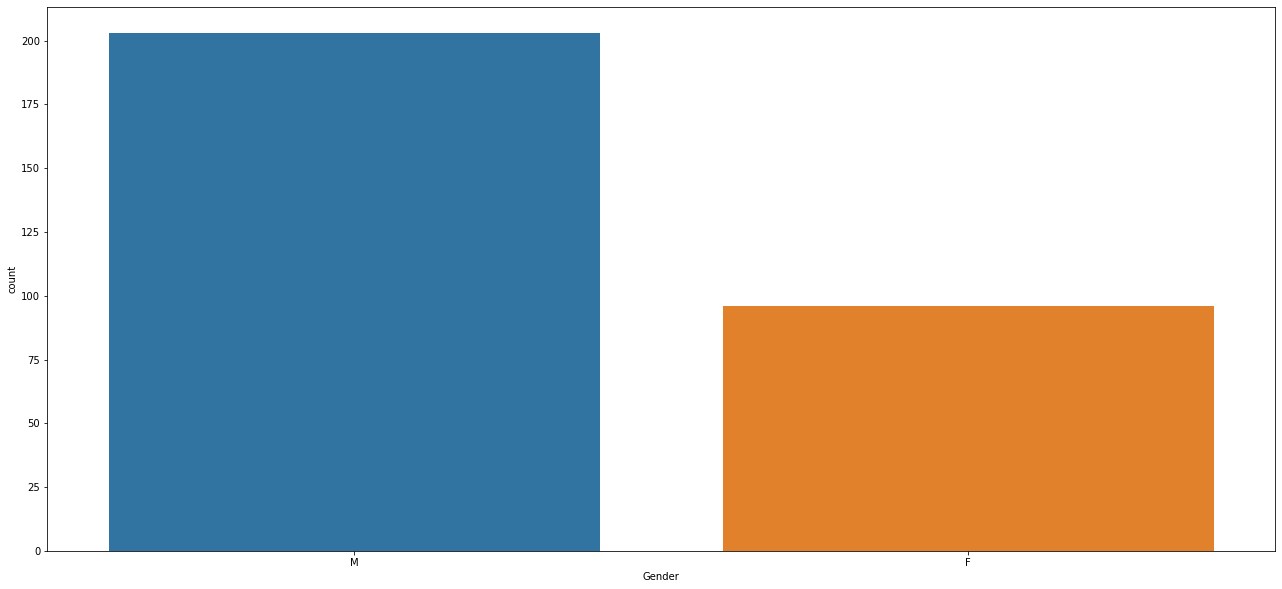

In [135]:
# 2. Do men seek help more than women? => Yes

heart_df = df.copy()
heart_df.replace({'sex': {0.: 'F', 1.: 'M'}}, inplace=True)  

# Bar plot
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.countplot(data=heart_df, x='sex', ax=ax)
ax.set(xlabel='Gender')
plt.show()

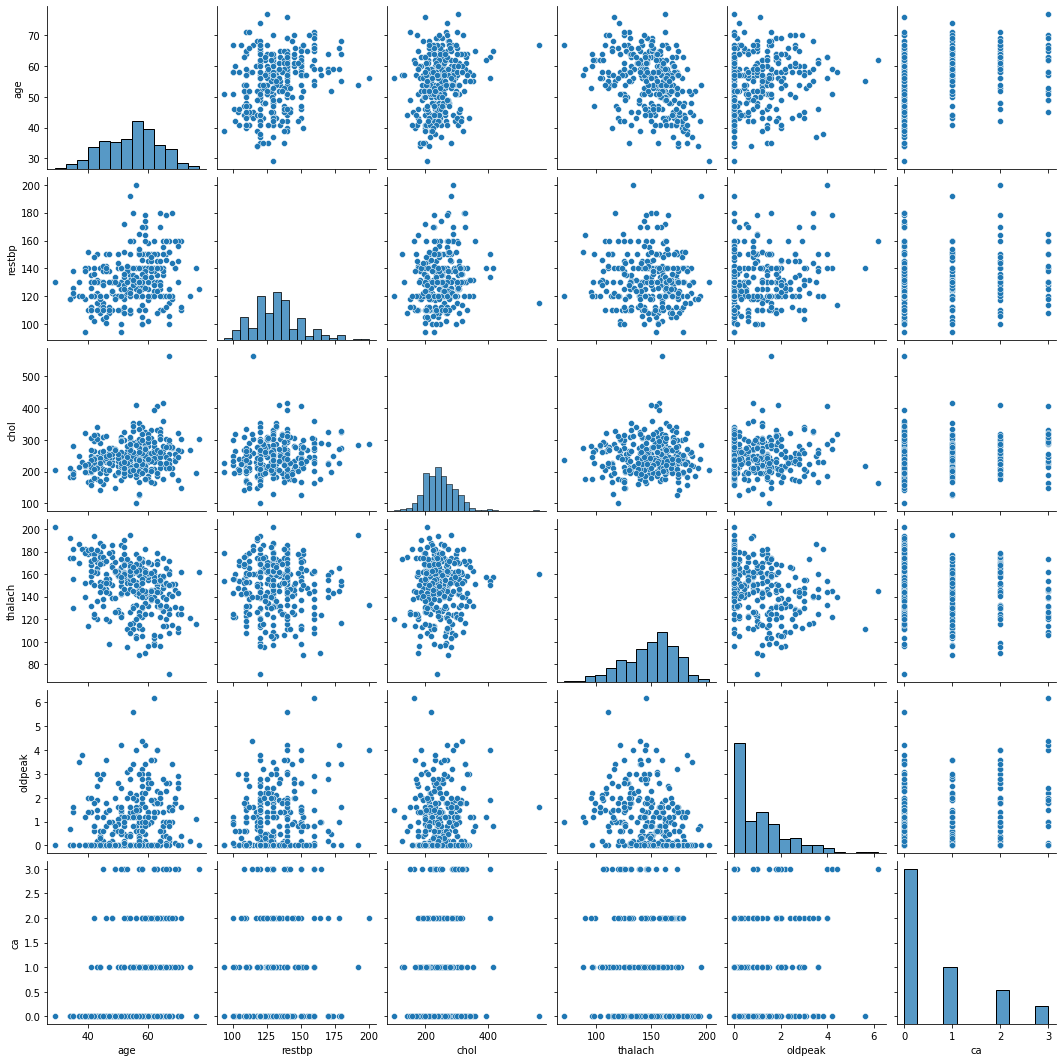

In [96]:
# 3. Examine the variables. How do they relate to one another?
heart_numerical_df = df[numerical_features].copy()

ax = sns.pairplot(data=heart_numerical_df)
plt.show()

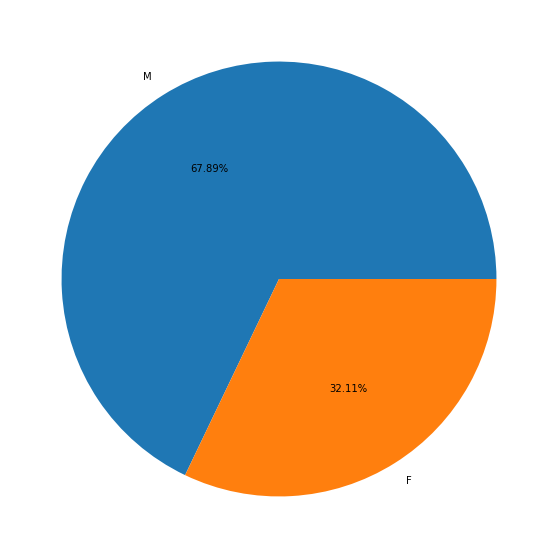

In [136]:
# 4. What percentage of men and women seek cardio exams? => MEN = 68% ; WOMEN = 32%

heart_df = df.copy()
heart_df.replace({'sex': {0.: 'F', 1.: 'M'}}, inplace=True)  

# Pie plot
fig, ax = plt.subplots(figsize=(22, 10))
ax = ax.pie(heart_df.sex.value_counts(), autopct="%.2f%%", labels=heart_df.sex.value_counts().index)
plt.show()

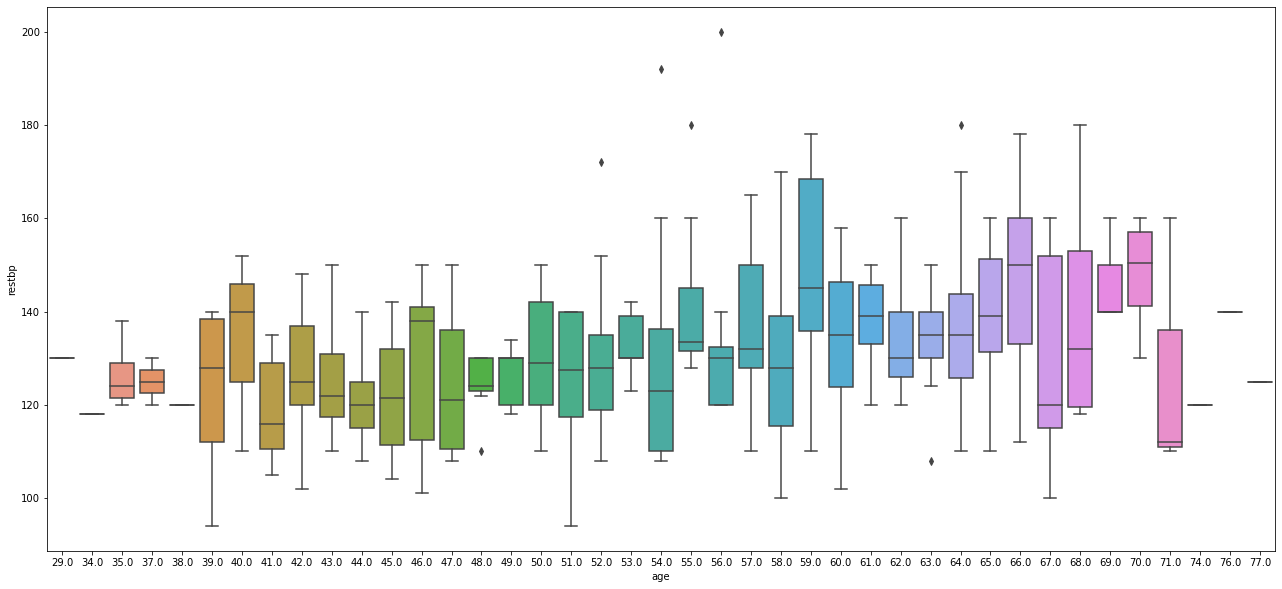

In [129]:
# 5. Does resting blood pressure increase with age? => Yes, globally. The variance increase.

fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.boxplot(data=df, x='age', y='restbp')
# ax = sns.swarmplot(x="age", y="restbp", data=df, color=".25")
plt.show()